# Using Training and Validation Sets

In this notebook you will use training and validation sets to identify which model best fits the data. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from numpy import polyfit
import pathlib as pl
import os
import pandas as pd
np.random.seed(1) # set the random seed for reproducibility 


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
def polynomial(x, coeffs):
    """calculates y values of polynomial at inputs x
    :param x: the input values the polynomial is to be evaluated at
    :param coeffs: the coefficients of the polynomial. The polynomial is of order len(coeffs)-1 """
    poly = np.poly1d(coeffs)
    return poly(x)

In [3]:
path_csv = pl.Path(os.getcwd()) / f'M5_data.csv'
with open(path_csv, 'rb') as file:
    data_pd = pd.read_csv(file)

data = {'X':data_pd['x'].to_numpy(), 'Y':data_pd['y'].to_numpy()}
data

{'X': array([ 0.60149128,  0.51542548, -1.3219511 ,  0.43855477, -1.8217943 ,
        -1.27379575,  1.51026655,  0.71015703, -0.76819698, -1.760773  ,
         0.19724297,  1.99612608, -1.0838355 , -1.71480879,  1.28515237,
         1.23929762, -1.7977855 ,  0.94072361,  0.44483927,  0.8155368 ,
        -1.98576078,  0.92483099,  1.53311809,  1.63688119, -0.28734181,
        -1.9228708 ,  0.83488324, -1.84288004,  0.35200025,  0.68294932,
         1.12486844, -1.32632808, -1.23666482,  0.13596266,  0.61374999,
         1.1757081 ,  1.83643382,  0.48573543, -0.28011941, -1.66508206]),
 'Y': array([ -3.55190898,   5.47532603, -16.68396633,   3.12807562,
        -43.71202742, -11.28635709,  20.13441257,  -1.74266838,
         -2.97624591, -32.23434374,   6.44902148,  60.83292922,
          1.14836985, -31.42787455,  15.35049183,   9.02477098,
        -35.65231236,   5.28001702,   4.8828683 ,   1.11915774,
        -52.3529877 ,   0.18076033,  20.71258232,  20.71555217,
          3.5464455 

## Part 1: Model Selection

### Task 1.1: Split the data

The first thing we do is split the data into the relevant sets using the split_data function. To begin with, split the data into 40% training, 30% validation and 30% test. 

In [4]:
def split_data(data_dict, data_split):
    """divide the data into training, validate and test sets. 
    :param data_dict: a dictionary of the data with keys 'X' and 'Y'
    :param data_split: a list of the fraction of the data to be in each set of form 
    [training_fraction, validation_fraction, test_fraction]. The fractions should all add up to 1.
    :returns training_dict, validation_dict, test_dict: dictionaries of the same form as the data_dict, 
    containing the different sets"""
    
    assert np.sum(data_split)-1 < 0.01
    
    # work out how many datapoints will be in the train and validation sets 
    n_train = int(len((data_dict['X']))*data_split[0])
    n_validate = int(len((data_dict['X']))*data_split[1])
    
    # generate a random permutation of indices of the data and split into training, validation and test
    perm = np.random.permutation(range(len(data_dict['X'])))
    indices_train, indices_validate, indices_test = np.split(perm, [n_train, n_train+ n_validate])
    
    # create training, validation and test dictionaries 
    training_dict = {'X': data['X'][indices_train], 'Y': data['Y'][indices_train]}
    validation_dict = {'X': data['X'][indices_validate], 'Y': data['Y'][indices_validate]}
    test_dict = {'X': data['X'][indices_test], 'Y': data['Y'][indices_test]}
    
    return training_dict, validation_dict, test_dict

In [5]:
# split the data into training, validation and test sets

### TO DO ###

split_data(data, [0.4, 0.3, 0.3])

({'X': array([-1.3219511 , -1.32632808,  0.43855477,  0.92483099, -1.84288004,
          0.68294932,  1.53311809, -1.66508206,  0.8155368 ,  0.83488324,
         -1.23666482,  0.94072361,  1.12486844,  1.83643382,  0.13596266,
          0.35200025]),
  'Y': array([-16.68396633,  -4.73993496,   3.12807562,   0.18076033,
         -54.37794078,   6.30528533,  20.71258232, -33.69125485,
           1.11915774,  -2.79116999,  -7.23992145,   5.28001702,
           7.87248396,  31.46994609,  -2.42220278,   0.38456681])},
 {'X': array([-1.8217943 ,  1.28515237,  0.19724297,  1.1757081 ,  1.63688119,
         -0.28734181,  0.61374999, -1.98576078,  0.44483927, -1.9228708 ,
          1.51026655, -1.71480879]),
  'Y': array([-43.71202742,  15.35049183,   6.44902148,  11.49536861,
          20.71555217,   3.5464455 ,   3.95552817, -52.3529877 ,
           4.8828683 , -52.68296975,  20.13441257, -31.42787455])},
 {'X': array([ 0.71015703, -0.28011941,  0.51542548, -1.7977855 ,  0.60149128,
         

### Task 1.2: Fit Models

Use the numpy polyfit function to fit polynomials of orders 1 to 6 to the training set. Make a dictionary containing the coefficients of the polynomials with the order of the polynomial as the key. So the coefficients dictionary should look like { 1: array, 2:array} and so on. 

In [684]:
orders = list(range(1, 7))
coefficients = {}

#######################
#TO DO: make dictionary containing coefficients of polynomials fitted to the training data as described above. 


######################

polyfit(x, orders)

In [6]:
coefficients

NameError: name 'coefficients' is not defined

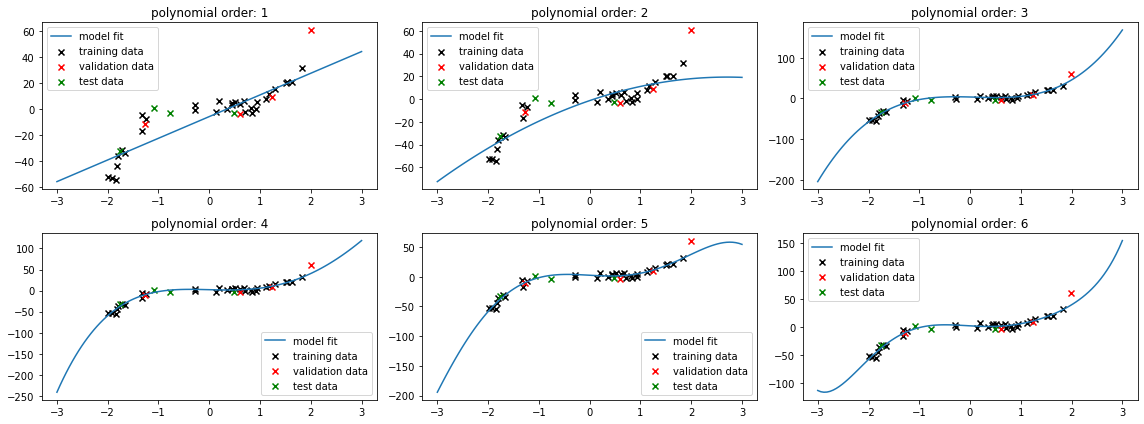

In [685]:
#### Plot each of the fitted models along with the training and validation data 

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 6))
ax = axs.flatten()

x_plot = np.linspace(-3, 3, 100)

for i, coeffs in enumerate(coefficients.values()):
    ax[i].plot(x_plot, polynomial(x_plot, coeffs), label='model fit')
    ax[i].scatter(training_data['X'], training_data['Y'], marker='x', color='k', label='training data')
    ax[i].scatter(validation_data['X'], validation_data['Y'], marker='x', color='r', label='validation data')
    ax[i].scatter(test_data['X'], test_data['Y'], marker='x', color='g', label='test data')
    ax[i].set_title(f'polynomial order: {list(coefficients.keys())[i]}')
    ax[i].legend()
plt.tight_layout()
plt.legend()



### Task 1.3: Calculate the RMSE for Training and Validation Sets


Calculate the root mean squared error for both the training and validation sets. Plot this on a graph, and use this to decide which model is the best fit. Fill out the first question in the corrosponding questionaire. 

In [686]:
training_RMSEs = []
validation_RMSEs = []

#######################
### TO DO ###


    
#######################

best = np.argmin(validation_RMSEs)
print('best model:', orders[best])

best model: 3


In [2]:
### TO DO ####
#Plot the training and validation RMSEs of the models


## Part 2: Model Performance

### Task 2.1 Use the test set to evaluate model performance 

Calculate the RMSE of the model predictions compared to the test data 

In [3]:
### TO DO: use the test dataset to calculate the RMSE of the best model on the test data

####################
